In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
df = pd.read_csv("crime_baltimore.csv")
df.head()

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,X,Y,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,...,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
0,-76.584281,39.282869,1,12A01562,2011/12/30 09:37:00+00,6E,LARCENY,I,NaN,214,...,NaN,2300 BOSTON ST,SOUTHEAST,NaN,CANTON,39.282869,-76.584281,"(39.282869,-76.584281)",GARAGE ON PRIV. PROP,1
1,-76.570626,39.367758,2,11L12669,2011/12/30 00:36:00+00,3JF,ROBBERY,I,FIREARM,423,...,NaN,6600 MOONFLOWER CT,NORTHEAST,NaN,HAMILTON HILLS,39.367758,-76.570626,"(39.367758,-76.570626)",ROW/TOWNHOUSE-OCC,1
2,-76.562701,39.323386,3,11L13076,2011/12/30 21:00:00+00,3AO,ROBBERY,O,OTHER,432,...,NaN,3400 SHANNON DR,NORTHEAST,NaN,BELAIR-EDISON,39.323386,-76.562701,"(39.323386,-76.562701)",ALLEY,1
3,-76.602909,39.232993,4,12A00628,2011/12/30 09:00:00+00,5A,BURGLARY,I,NaN,913,...,NaN,600 E JEFFREY ST,SOUTHERN,NaN,BROOKLYN,39.232993,-76.602909,"(39.232993,-76.602909)",ROW/TOWNHOUSE-OCC,1
4,-76.576114,39.292284,5,11L13140,2011/12/30 00:13:00+00,4C,AGG. ASSAULT,O,OTHER,222,...,NaN,2900 E BALTIMORE ST,SOUTHEAST,NaN,PATTERSON PARK NEIGHBORHOOD,39.292284,-76.576114,"(39.292284,-76.576114)",STREET,1


In [3]:
df.shape

(587673, 23)

no of rows = 587673

no of columns = 23

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587673 entries, 0 to 587672
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                586689 non-null  float64
 1   Y                586689 non-null  float64
 2   RowID            587673 non-null  int64  
 3   CCNumber         587673 non-null  object 
 4   CrimeDateTime    587673 non-null  object 
 5   CrimeCode        587673 non-null  object 
 6   Description      587673 non-null  object 
 7   Inside_Outside   536412 non-null  object 
 8   Weapon           145090 non-null  object 
 9   Post             579693 non-null  object 
 10  Gender           493050 non-null  object 
 11  Age              473013 non-null  float64
 12  Race             567987 non-null  object 
 13  Ethnicity        61611 non-null   object 
 14  Location         584616 non-null  object 
 15  Old_District     563488 non-null  object 
 16  New_District     16201 non-null   obje

In [5]:
df.columns

Index(['X', 'Y', 'RowID', 'CCNumber', 'CrimeDateTime', 'CrimeCode',
       'Description', 'Inside_Outside', 'Weapon', 'Post', 'Gender', 'Age',
       'Race', 'Ethnicity', 'Location', 'Old_District', 'New_District',
       'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
       'Total_Incidents'],
      dtype='object')

# Droping unnecessary columns 

In [6]:
drop_columns = ['X','Y','RowID','CCNumber','CrimeCode','Post','Location','Neighborhood','New_District','GeoLocation','Total_Incidents','PremiseType']
df1 = df.drop(drop_columns,axis=1)
df1.head()

,CrimeDateTime,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,Latitude,Longitude
0,2011/12/30 09:37:00+00,LARCENY,I,NaN,M,42.0,UNKNOWN,NaN,SOUTHEAST,39.282869,-76.584281
1,2011/12/30 00:36:00+00,ROBBERY,I,FIREARM,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHEAST,39.367758,-76.570626
2,2011/12/30 21:00:00+00,ROBBERY,O,OTHER,M,NaN,WHITE,NaN,NORTHEAST,39.323386,-76.562701
3,2011/12/30 09:00:00+00,BURGLARY,I,NaN,F,28.0,WHITE,NaN,SOUTHERN,39.232993,-76.602909
4,2011/12/30 00:13:00+00,AGG. ASSAULT,O,OTHER,M,21.0,BLACK_OR_AFRICAN_AMERICAN,NaN,SOUTHEAST,39.292284,-76.576114


# Check for nulls

In [7]:
df1.isnull().sum()

CrimeDateTime          0
Description            0
Inside_Outside     51261
Weapon            442583
Gender             94623
Age               114660
Race               19686
Ethnicity         526062
Old_District       24185
Latitude             984
Longitude            984
dtype: int64

In [9]:
# Percentage of nulls
df1.isnull().sum().map(lambda r:(r/len(df1))*100)

CrimeDateTime      0.000000
Description        0.000000
Inside_Outside     8.722708
Weapon            75.311100
Gender            16.101301
Age               19.510850
Race               3.349822
Ethnicity         89.516108
Old_District       4.115384
Latitude           0.167440
Longitude          0.167440
dtype: float64

As the columns 'Weapons' and 'Ethnicity' have null percentages exceeding 75%, the decision is to eliminate these columns instead of attempting to fill the missing values.

In [8]:
df1 = df1.drop(['Weapon','Ethnicity'],axis=1)
df1.head()

,CrimeDateTime,Description,Inside_Outside,Gender,Age,Race,Old_District,Latitude,Longitude
0,2011/12/30 09:37:00+00,LARCENY,I,M,42.0,UNKNOWN,SOUTHEAST,39.282869,-76.584281
1,2011/12/30 00:36:00+00,ROBBERY,I,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.367758,-76.570626
2,2011/12/30 21:00:00+00,ROBBERY,O,M,NaN,WHITE,NORTHEAST,39.323386,-76.562701
3,2011/12/30 09:00:00+00,BURGLARY,I,F,28.0,WHITE,SOUTHERN,39.232993,-76.602909
4,2011/12/30 00:13:00+00,AGG. ASSAULT,O,M,21.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,39.292284,-76.576114


In [9]:
df1.isnull().sum().map(lambda r:(r/len(df1))*100)

CrimeDateTime      0.000000
Description        0.000000
Inside_Outside     8.722708
Gender            16.101301
Age               19.510850
Race               3.349822
Old_District       4.115384
Latitude           0.167440
Longitude          0.167440
dtype: float64

In [10]:
df1.Latitude.describe()

count    586689.000000
mean         38.862409
std           4.155544
min           0.000000
25%          39.287644
50%          39.302351
75%          39.326408
max          39.372088
Name: Latitude, dtype: float64

In [11]:
df1.Longitude.describe()

count    586689.000000
mean        -75.751416
std           8.099980
min         -76.711280
25%         -76.648495
50%         -76.613711
75%         -76.586055
max           0.000000
Name: Longitude, dtype: float64

In [12]:
df1[(df1.Longitude == 0) & (df1.Latitude == 0) ]

,CrimeDateTime,Description,Inside_Outside,Gender,Age,Race,Old_District,Latitude,Longitude
42,2011/03/21 12:00:00+00,BURGLARY,I,NaN,NaN,UNKNOWN,NaN,0.0,0.0
453,2012/06/19 09:45:00+00,AUTO THEFT,O,M,22.0,WHITE,NaN,0.0,0.0
616,2011/06/18 12:00:00+00,AUTO THEFT,O,M,47.0,WHITE,NaN,0.0,0.0
755,2011/03/01 11:45:00+00,LARCENY FROM AUTO,O,F,68.0,WHITE,NaN,0.0,0.0
1157,2011/02/17 03:30:00+00,COMMON ASSAULT,O,M,23.0,WHITE,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
586099,2012/02/01 12:50:00+00,LARCENY FROM AUTO,O,F,26.0,BLACK_OR_AFRICAN_AMERICAN,NaN,0.0,0.0
586190,2011/11/15 13:00:00+00,LARCENY FROM AUTO,O,F,19.0,BLACK_OR_AFRICAN_AMERICAN,NaN,0.0,0.0
586272,2012/01/31 20:45:00+00,COMMON ASSAULT,I,F,31.0,BLACK_OR_AFRICAN_AMERICAN,NaN,0.0,0.0
586554,2011/11/06 12:50:00+00,LARCENY FROM AUTO,O,M,28.0,WHITE,NaN,0.0,0.0


Certain rows exhibit latitude and longitude values of 0, which is illogical for data collected in Baltimore City. Hence, these entries will be removed.

In [13]:
df1 = df1[(df1.Latitude!=0)|(df1.Longitude!=0)]

In [14]:
df1.Latitude.describe()

count    580057.000000
mean         39.306737
std           0.029543
min          39.200107
25%          39.288009
50%          39.302963
75%          39.326911
max          39.372088
Name: Latitude, dtype: float64

In [15]:
df1.Longitude.describe()

count    580057.000000
mean        -76.617509
std           0.042504
min         -76.711280
25%         -76.648913
50%         -76.614102
75%         -76.587412
max         -76.529748
Name: Longitude, dtype: float64

If we look at the descrptive stats of the columns Latitude and Longitude, means and medians of these columns are almost equal so nulls can be filled by mean or median.

In [16]:
df1.Latitude = df1.Latitude.fillna(value=df1.Latitude.median())
df1.Longitude = df1.Longitude.fillna(value=df1.Longitude.median())

In [17]:
df1.Age.describe()

count    467551.000000
mean         37.901555
std          35.878158
min       -7979.000000
25%          26.000000
50%          35.000000
75%          49.000000
max        8251.000000
Name: Age, dtype: float64

In [18]:
df1[(df1.Age<=7) | (df1.Age>100)]

,CrimeDateTime,Description,Inside_Outside,Gender,Age,Race,Old_District,Latitude,Longitude
102,2011/10/21 18:10:00+00,BURGLARY,I,F,0.0,WHITE,SOUTHEAST,39.292442,-76.586979
284,2012/08/30 17:30:00+00,AGG. ASSAULT,I,M,6.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.345239,-76.549757
546,2011/03/06 12:43:00+00,AGG. ASSAULT,O,M,3.0,BLACK_OR_AFRICAN_AMERICAN,NORTHERN,39.315003,-76.622020
558,2011/03/06 12:43:00+00,AGG. ASSAULT,O,M,0.0,BLACK_OR_AFRICAN_AMERICAN,NORTHERN,39.315003,-76.622020
615,2011/06/18 14:00:00+00,COMMON ASSAULT,NaN,F,7.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,39.280953,-76.649606
...,...,...,...,...,...,...,...,...,...
586259,2011/11/14 14:15:00+00,BURGLARY,I,F,0.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.318909,-76.549072
586611,2023/08/27 03:00:00+00,ARSON,Inside,M,5.0,NaN,NaN,39.328255,-76.609355
586626,2023/08/23 23:33:00+00,AGG. ASSAULT,Outside,F,3.0,BLACK_OR_AFRICAN_AMERICAN,NaN,39.350610,-76.582686
586845,2023/09/01 15:46:00+00,COMMON ASSAULT,Outside,M,2.0,BLACK_OR_AFRICAN_AMERICAN,NaN,39.342670,-76.672144


 There are some entries which has age less than 0 and certain entries has age value in thousands. As age cant be in negative and  that high, considering only age range of 8 - 100 and droping of all other entries.

In [19]:
df1 = df1[(df1.Age>7) & (df1.Age<100)]

In [20]:
df1.Age.describe()

count    464733.000000
mean         38.175053
std          15.497595
min           8.000000
25%          26.000000
50%          35.000000
75%          49.000000
max          99.000000
Name: Age, dtype: float64

In [396]:
#filling the nulls with medians for column Age

In [21]:
df1.Age = df1.Age.fillna(value = df1.Age.median())

In [398]:
#filling categorical variables with mode

In [22]:
df1.Old_District = df1.Old_District.fillna(value = df1.Old_District.mode()[0])
df1.Gender = df1.Gender.fillna(value = df1.Gender.mode()[0])
df1.Inside_Outside = df1.Inside_Outside.fillna(value = df1.Inside_Outside.mode()[0])
df1.Race = df1.Race.fillna(value = df1.Race.mode()[0])

In [23]:
#nulls after filling 
df1.isnull().sum()

CrimeDateTime     0
Description       0
Inside_Outside    0
Gender            0
Age               0
Race              0
Old_District      0
Latitude          0
Longitude         0
dtype: int64

In [24]:
df1_num = df1.select_dtypes(include = np.number)
df1_num.head()

,Age,Latitude,Longitude
0,42.0,39.282869,-76.584281
1,22.0,39.367758,-76.570626
3,28.0,39.232993,-76.602909
4,21.0,39.292284,-76.576114
5,42.0,39.307359,-76.599017


# Check for outliers

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


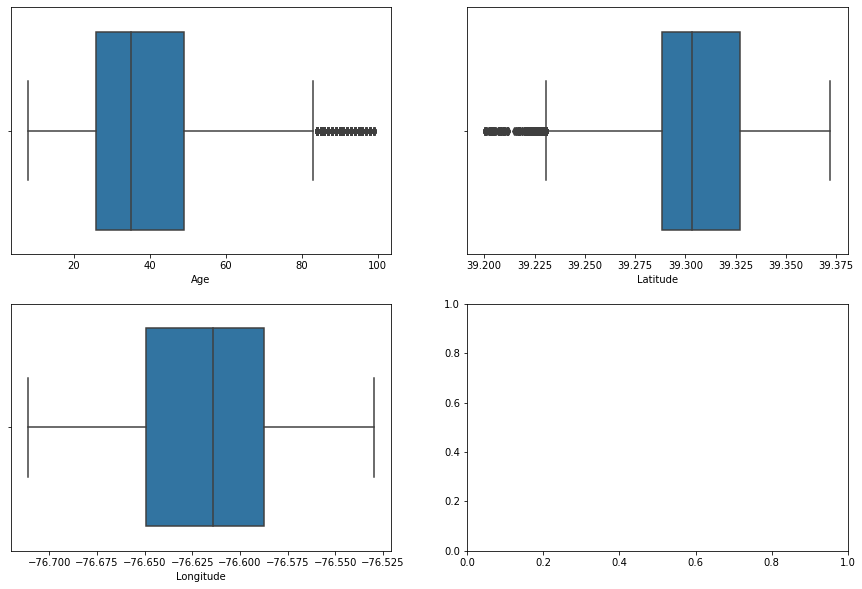

In [25]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
for v,s in zip(df1_num.columns,ax.flatten()):
    sns.boxplot(df1_num[v],ax=s)
plt.show()

Even though there are few outliers in columns 'Age' and 'Latitude', as there are only few, not treating them.

Converting description column into target by encoding the column. Considering Rape,Shooting,homicide,arson, Aggravated Assault,BURGLARY as violent crimes and encoding them as 1 and remaining else 0.

In [26]:
def violent_encod(value):
    if value in ['RAPE','HOMICIDE','ARSON','SHOOTING','BURGLARY','AGG. ASSAULT']:
        return 1
    else:
        return 0

In [27]:
df1['violent_crime'] = df.Description.apply(violent_encod)
df1.violent_crime.value_counts()

0    332234
1    132499
Name: violent_crime, dtype: int64

In [28]:
df1.head()

,CrimeDateTime,Description,Inside_Outside,Gender,Age,Race,Old_District,Latitude,Longitude,violent_crime
0,2011/12/30 09:37:00+00,LARCENY,I,M,42.0,UNKNOWN,SOUTHEAST,39.282869,-76.584281,0
1,2011/12/30 00:36:00+00,ROBBERY,I,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.367758,-76.570626,0
3,2011/12/30 09:00:00+00,BURGLARY,I,F,28.0,WHITE,SOUTHERN,39.232993,-76.602909,1
4,2011/12/30 00:13:00+00,AGG. ASSAULT,O,M,21.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,39.292284,-76.576114,1
5,2011/12/30 22:11:00+00,AGG. ASSAULT,O,M,42.0,BLACK_OR_AFRICAN_AMERICAN,EASTERN,39.307359,-76.599017,1


# Checking categorical data for anamolies

In [29]:
df1.Inside_Outside.value_counts()

O          214758
I          157399
Outside     50817
Inside      41759
Name: Inside_Outside, dtype: int64

There are 4 different classes in the column 'Inside_Outside', where I and Inside class indicates that the crime happened inside and O and Outside classes indicates  that the crime happened outside. Converting I and Inside into Inside and O and Outside into Outside

In [30]:
def inside_outside_conv(value):
    if value in ['Inside','I']:
        return 'Inside'
    else:
        return 'Outside'

In [31]:
df1.Inside_Outside = df1.Inside_Outside.apply(inside_outside_conv)
df1.Inside_Outside.value_counts()

Outside    265575
Inside     199158
Name: Inside_Outside, dtype: int64

In [32]:
df1.Gender.value_counts()

F             245426
M             208309
Male            8581
U               1169
Female          1051
B                120
W                 19
N                 12
,                 11
Transgende         9
FB                 5
160                2
O                  2
D                  1
T                  1
FU                 1
FM                 1
042819             1
S                  1
17                 1
M\                 1
8                  1
165                1
50                 1
120                1
MB                 1
A                  1
FW                 1
77                 1
FF                 1
Name: Gender, dtype: int64

There are lot of classes in the variable 'Gender'. Converting all of them into 3 categories 'M','F','U'.

In [33]:
def gend_conv(value):
    if value in ['Male','M']:
        return 'M'
    elif value in ['Female','F']:
        return 'F'
    else:
        return 'U'

In [34]:
df1.Gender = df1.Gender.apply(gend_conv)
df1.Gender.value_counts()

F    246477
M    216890
U      1366
Name: Gender, dtype: int64

In [35]:
df1.Race.value_counts()

BLACK_OR_AFRICAN_AMERICAN                    300182
WHITE                                        115759
UNKNOWN                                       46294
ASIAN                                          1407
AMERICAN_INDIAN_OR_ALASKA_NATIVE                735
NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER       356
Name: Race, dtype: int64

In [37]:
df1.Old_District.value_counts()

NORTHEAST    85101
SOUTHEAST    61047
SOUTHERN     51490
CENTRAL      50756
NORTHERN     47679
SOUTHWEST    46144
NORTHWEST    45168
EASTERN      40106
WESTERN      37240
NWD              1
ND               1
Name: Old_District, dtype: int64

If we look at the categories of Old_District, for categories NWD and ND, there are only one entry each. The impact of the these categories on the target cant be explained as no of rows in these categories is very low. So removing those rows.

In [36]:
df1 = df1[(df1.Old_District != 'NWD') & (df1.Old_District != 'ND')]

In [37]:
df1.Old_District.value_counts()

NORTHEAST    85101
SOUTHEAST    61047
SOUTHERN     51490
CENTRAL      50756
NORTHERN     47679
SOUTHWEST    46144
NORTHWEST    45168
EASTERN      40106
WESTERN      37240
Name: Old_District, dtype: int64

# Visualizations

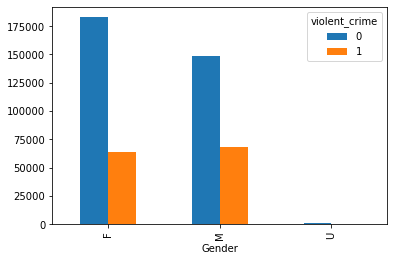

In [38]:
pd.crosstab(index=df1.Gender,columns=df1.violent_crime).plot(kind='bar')
plt.show()

In [39]:
df1.columns

Index(['CrimeDateTime', 'Description', 'Inside_Outside', 'Gender', 'Age',
       'Race', 'Old_District', 'Latitude', 'Longitude', 'violent_crime'],
      dtype='object')

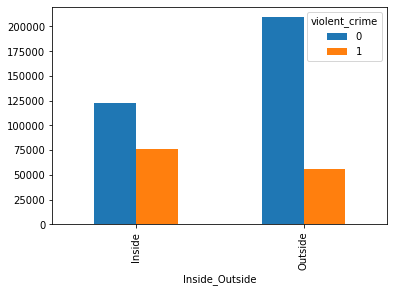

In [40]:
pd.crosstab(index = df1.Inside_Outside,columns = df1.violent_crime).plot(kind='bar')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


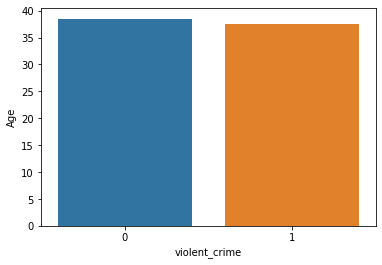

In [41]:
sns.barplot(df1.violent_crime,df1.Age)
plt.show()

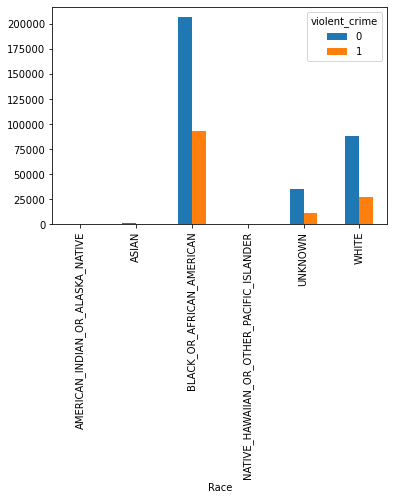

In [42]:
pd.crosstab(index = df1.Race,columns = df1.violent_crime).plot(kind='bar')
plt.show()

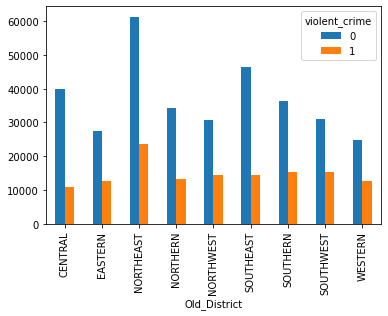

In [43]:
pd.crosstab(index = df1.Old_District,columns = df1.violent_crime).plot(kind='bar')
plt.show()

In [44]:
df1.head()

,CrimeDateTime,Description,Inside_Outside,Gender,Age,Race,Old_District,Latitude,Longitude,violent_crime
0,2011/12/30 09:37:00+00,LARCENY,Inside,M,42.0,UNKNOWN,SOUTHEAST,39.282869,-76.584281,0
1,2011/12/30 00:36:00+00,ROBBERY,Inside,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.367758,-76.570626,0
3,2011/12/30 09:00:00+00,BURGLARY,Inside,F,28.0,WHITE,SOUTHERN,39.232993,-76.602909,1
4,2011/12/30 00:13:00+00,AGG. ASSAULT,Outside,M,21.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,39.292284,-76.576114,1
5,2011/12/30 22:11:00+00,AGG. ASSAULT,Outside,M,42.0,BLACK_OR_AFRICAN_AMERICAN,EASTERN,39.307359,-76.599017,1


# Extracting Year, Month, Date, and hour from the column 'CrimeDateTime'

In [45]:
df1['Year'] = df1.CrimeDateTime.map(lambda x:int(x[0:4]))
df1['Month'] = df1.CrimeDateTime.map(lambda x:int(x[5:7]))
df1['Day'] = df1.CrimeDateTime.map(lambda x:int(x[8:10]))
df1['time_hour'] = df1.CrimeDateTime.map(lambda x:int(x[11:13]))

In [46]:
df1.head()

,CrimeDateTime,Description,Inside_Outside,Gender,Age,Race,Old_District,Latitude,Longitude,violent_crime,Year,Month,Day,time_hour
0,2011/12/30 09:37:00+00,LARCENY,Inside,M,42.0,UNKNOWN,SOUTHEAST,39.282869,-76.584281,0,2011,12,30,9
1,2011/12/30 00:36:00+00,ROBBERY,Inside,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.367758,-76.570626,0,2011,12,30,0
3,2011/12/30 09:00:00+00,BURGLARY,Inside,F,28.0,WHITE,SOUTHERN,39.232993,-76.602909,1,2011,12,30,9
4,2011/12/30 00:13:00+00,AGG. ASSAULT,Outside,M,21.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,39.292284,-76.576114,1,2011,12,30,0
5,2011/12/30 22:11:00+00,AGG. ASSAULT,Outside,M,42.0,BLACK_OR_AFRICAN_AMERICAN,EASTERN,39.307359,-76.599017,1,2011,12,30,22


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


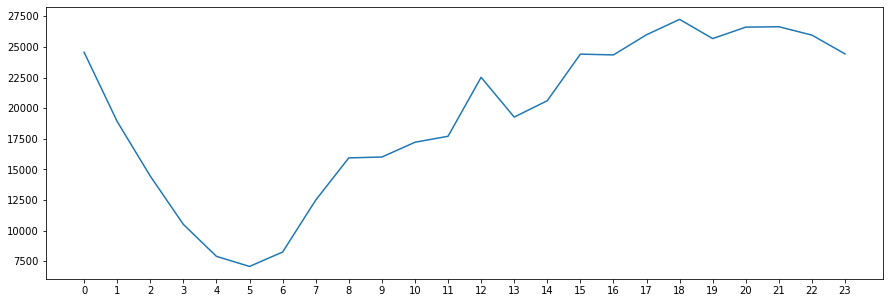

In [47]:
hour = list(df1.time_hour.value_counts().index)
no_of_crimes = list(df1.time_hour.value_counts().values) 
plt.figure(figsize=(15,5))
sns.lineplot(hour,no_of_crimes)
plt.xticks(hour)
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


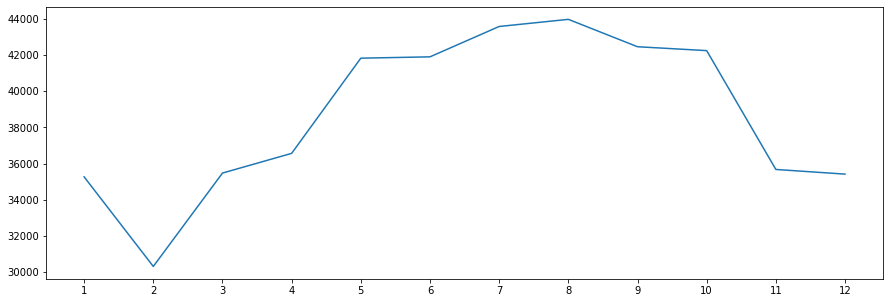

In [43]:
month = list(df1.Month.value_counts().index)
no_of_crimes = list(df1.Month.value_counts().values) 
plt.figure(figsize=(15,5))
sns.lineplot(month,no_of_crimes)
plt.xticks(month)
plt.show()

Considering only data from year 2011

In [48]:
df1 = df1[df1.Year>=2011]

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


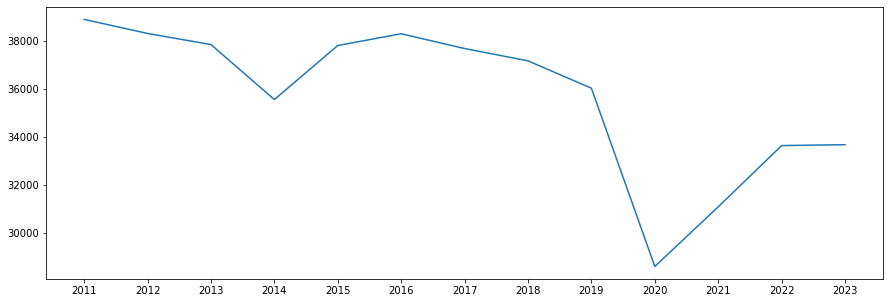

In [49]:
year = list(df1.Year.value_counts().index)
no_of_crimes = list(df1.Year.value_counts().values) 
plt.figure(figsize=(15,5))
sns.lineplot(year,no_of_crimes)
plt.xticks(year)
plt.show()

In [50]:
df1.columns

Index(['CrimeDateTime', 'Description', 'Inside_Outside', 'Gender', 'Age',
       'Race', 'Old_District', 'Latitude', 'Longitude', 'violent_crime',
       'Year', 'Month', 'Day', 'time_hour'],
      dtype='object')

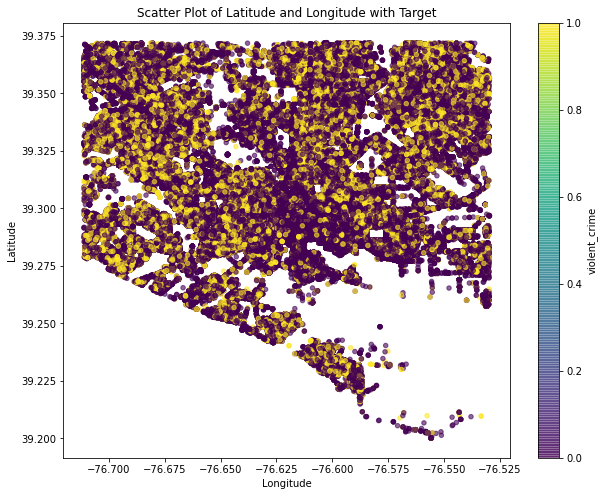

In [51]:
plt.figure(figsize=(10, 8))
plt.scatter(df1['Longitude'], df1['Latitude'], c=df1['violent_crime'], cmap='viridis', s=20, alpha=0.6)
plt.colorbar(label='violent_crime')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude with Target')
plt.show()

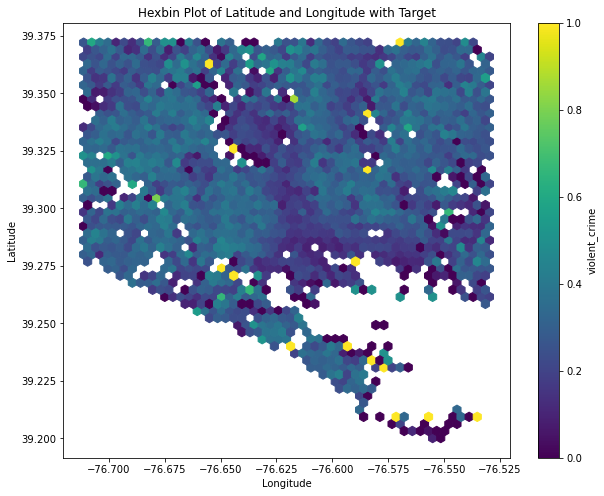

In [48]:
plt.figure(figsize=(10, 8))
plt.hexbin(df1['Longitude'], df1['Latitude'], C=df1['violent_crime'], gridsize=50, cmap='viridis')
plt.colorbar(label='violent_crime')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Latitude and Longitude with Target')
plt.show()

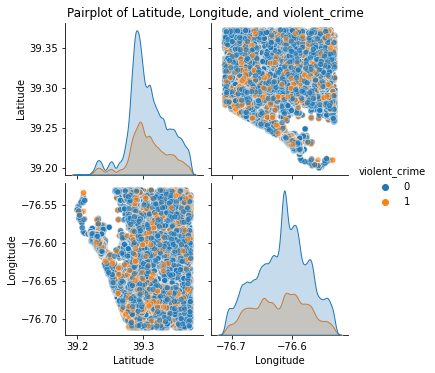

In [49]:
data_for_pairplot = df1[['Latitude', 'Longitude', 'violent_crime']]

sns.pairplot(data_for_pairplot, hue='violent_crime', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Latitude, Longitude, and violent_crime', y=1.02)
plt.show()

# Classification models

# Categorical encoding

In [50]:
df1.columns

Index(['CrimeDateTime', 'Description', 'Inside_Outside', 'Gender', 'Age',
       'Race', 'Old_District', 'Latitude', 'Longitude', 'violent_crime',
       'Year', 'Month', 'Day', 'time_hour'],
      dtype='object')

In [51]:
df1.Inside_Outside.value_counts()

Outside    265534
Inside     199042
Name: Inside_Outside, dtype: int64

In [52]:
df1.Gender.value_counts()

F    246346
M    216864
U      1366
Name: Gender, dtype: int64

As there are only 2 categories in the column 'Inside_Outside' and 3 categories in the column 'gender',using get dummies 

In [53]:
encoded_data = pd.get_dummies(df1[['Inside_Outside','Gender']],drop_first=True)

In [54]:
df1 = pd.concat([df1,encoded_data],axis=1)
df1.head()

,CrimeDateTime,Description,Inside_Outside,Gender,Age,Race,Old_District,Latitude,Longitude,violent_crime,Year,Month,Day,time_hour,Inside_Outside_Outside,Gender_M,Gender_U
0,2011/12/30 09:37:00+00,LARCENY,Inside,M,42.0,UNKNOWN,SOUTHEAST,39.282869,-76.584281,0,2011,12,30,9,0,1,0
1,2011/12/30 00:36:00+00,ROBBERY,Inside,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.367758,-76.570626,0,2011,12,30,0,0,1,0
3,2011/12/30 09:00:00+00,BURGLARY,Inside,F,28.0,WHITE,SOUTHERN,39.232993,-76.602909,1,2011,12,30,9,0,0,0
4,2011/12/30 00:13:00+00,AGG. ASSAULT,Outside,M,21.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,39.292284,-76.576114,1,2011,12,30,0,1,1,0
5,2011/12/30 22:11:00+00,AGG. ASSAULT,Outside,M,42.0,BLACK_OR_AFRICAN_AMERICAN,EASTERN,39.307359,-76.599017,1,2011,12,30,22,1,1,0


In [55]:
df1.Race.value_counts()

BLACK_OR_AFRICAN_AMERICAN                    300064
WHITE                                        115731
UNKNOWN                                       46285
ASIAN                                          1405
AMERICAN_INDIAN_OR_ALASKA_NATIVE                735
NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER       356
Name: Race, dtype: int64

In [56]:
df1.Old_District.value_counts()

NORTHEAST    85077
SOUTHEAST    61031
SOUTHERN     51471
CENTRAL      50746
NORTHERN     47656
SOUTHWEST    46132
NORTHWEST    45147
EASTERN      40089
WESTERN      37227
Name: Old_District, dtype: int64

Using label encoder for the columns 'Old_District' and 'Race' as there are more catgories

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [58]:
df1['Old_District_encoded'] = encoder.fit_transform(df1['Old_District'])
df1['Race_encoded'] = encoder.fit_transform(df1['Race'])

In [59]:
df1.head()

,CrimeDateTime,Description,Inside_Outside,Gender,Age,Race,Old_District,Latitude,Longitude,violent_crime,Year,Month,Day,time_hour,Inside_Outside_Outside,Gender_M,Gender_U,Old_District_encoded,Race_encoded
0,2011/12/30 09:37:00+00,LARCENY,Inside,M,42.0,UNKNOWN,SOUTHEAST,39.282869,-76.584281,0,2011,12,30,9,0,1,0,5,4
1,2011/12/30 00:36:00+00,ROBBERY,Inside,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,39.367758,-76.570626,0,2011,12,30,0,0,1,0,2,2
3,2011/12/30 09:00:00+00,BURGLARY,Inside,F,28.0,WHITE,SOUTHERN,39.232993,-76.602909,1,2011,12,30,9,0,0,0,6,5
4,2011/12/30 00:13:00+00,AGG. ASSAULT,Outside,M,21.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,39.292284,-76.576114,1,2011,12,30,0,1,1,0,5,2
5,2011/12/30 22:11:00+00,AGG. ASSAULT,Outside,M,42.0,BLACK_OR_AFRICAN_AMERICAN,EASTERN,39.307359,-76.599017,1,2011,12,30,22,1,1,0,1,2


In [60]:
df1.columns

Index(['CrimeDateTime', 'Description', 'Inside_Outside', 'Gender', 'Age',
       'Race', 'Old_District', 'Latitude', 'Longitude', 'violent_crime',
       'Year', 'Month', 'Day', 'time_hour', 'Inside_Outside_Outside',
       'Gender_M', 'Gender_U', 'Old_District_encoded', 'Race_encoded'],
      dtype='object')

Sorting the data by the date. For doing it sorting the data by hour, day, month, year so that we will get the data in order of date.

In [61]:
df1 = df1.sort_values(by=['time_hour','Day','Month','Year'])

In [62]:
df2 = df1[['Age','Latitude', 'Longitude','Year', 'Month', 'Day', 'time_hour', 'Inside_Outside_Outside',
       'Gender_M', 'Gender_U', 'Old_District_encoded', 'Race_encoded','violent_crime']]

In [63]:
df2.head()

,Age,Latitude,Longitude,Year,Month,Day,time_hour,Inside_Outside_Outside,Gender_M,Gender_U,Old_District_encoded,Race_encoded,violent_crime
518181,20.0,39.292497,-76.611250,2011,1,1,0,1,0,0,0,2,0
518291,26.0,39.276987,-76.613380,2011,1,1,0,0,0,0,6,5,0
518292,79.0,39.309296,-76.628978,2011,1,1,0,1,1,0,0,2,0
518293,28.0,39.323589,-76.549758,2011,1,1,0,0,1,0,2,4,1
518417,42.0,39.286675,-76.607713,2011,1,1,0,1,1,0,0,5,0


In [64]:
df2 = df2.reset_index(drop = True)
df2.head()

,Age,Latitude,Longitude,Year,Month,Day,time_hour,Inside_Outside_Outside,Gender_M,Gender_U,Old_District_encoded,Race_encoded,violent_crime
0,20.0,39.292497,-76.611250,2011,1,1,0,1,0,0,0,2,0
1,26.0,39.276987,-76.613380,2011,1,1,0,0,0,0,6,5,0
2,79.0,39.309296,-76.628978,2011,1,1,0,1,1,0,0,2,0
3,28.0,39.323589,-76.549758,2011,1,1,0,0,1,0,2,4,1
4,42.0,39.286675,-76.607713,2011,1,1,0,1,1,0,0,5,0


# Spliting the data 

In [65]:
X = df2.drop('violent_crime',axis=1)
y = df2['violent_crime']

As we are considering time columns as predictors, not spliting the data randomly

In [67]:
print("The length of the data frame :",len(df2))
print("Index for 70% of the data = :",len(df2)*0.7)

The length of the data frame : 464576
Index for 70% of the data = : 325203.19999999995


Considering data from index 0 to index 325204 as training data and remaining data as test data

In [68]:
x_train = X.iloc[0:325204]
x_test = X.iloc[325204:]

In [69]:
y_train = y.iloc[0:325204]
y_test = y.iloc[325204:]

# Logistic Regression

In [ ]:
#scaling the data 

In [70]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [71]:
x_train_sc = std_scaler.fit_transform(X=x_train)
x_train_sc = pd.DataFrame(x_train_sc,columns = X.columns)
x_train_sc.head()

,Age,Latitude,Longitude,Year,Month,Day,time_hour,Inside_Outside_Outside,Gender_M,Gender_U,Old_District_encoded,Race_encoded
0,-1.169370,-0.490805,0.155106,-1.543334,-1.682207,-1.64252,-1.737084,0.909615,-0.922085,-0.054837,-1.533685,-0.708493
1,-0.788055,-1.017729,0.104788,-1.543334,-1.682207,-1.64252,-1.737084,-1.099366,-0.922085,-0.054837,0.892582,1.550184
2,2.580234,0.079916,-0.263636,-1.543334,-1.682207,-1.64252,-1.737084,0.909615,1.084498,-0.054837,-1.533685,-0.708493
3,-0.660949,0.565498,1.607540,-1.543334,-1.682207,-1.64252,-1.737084,-1.099366,1.084498,-0.054837,-0.724929,0.797292
4,0.228787,-0.688595,0.238643,-1.543334,-1.682207,-1.64252,-1.737084,0.909615,1.084498,-0.054837,-1.533685,1.550184


In [72]:
x_test_sc = std_scaler.fit_transform(X=x_test)
x_test_sc = pd.DataFrame(x_test_sc,columns = X.columns)
x_test_sc.head()

,Age,Latitude,Longitude,Year,Month,Day,time_hour,Inside_Outside_Outside,Gender_M,Gender_U,Old_District_encoded,Race_encoded
0,2.704998,-0.121638,0.086197,-1.565509,-1.743491,0.400234,-1.778696,0.769075,1.033019,-0.053041,-0.752826,1.548824
1,1.028634,1.169195,-1.560590,-1.565509,-1.743491,0.400234,-1.778696,0.769075,-0.968036,-0.053041,0.065688,-0.708383
2,0.425143,-0.472526,-0.042189,-1.565509,-1.743491,0.400234,-1.778696,0.769075,1.033019,-0.053041,-1.571339,1.548824
3,-0.647730,0.139388,0.127315,-1.297302,-1.743491,0.400234,-1.778696,0.769075,-0.968036,-0.053041,-1.162083,-0.708383
4,-0.446566,-0.724239,0.458063,-1.297302,-1.743491,0.400234,-1.778696,0.769075,1.033019,-0.053041,0.474945,-0.708383


In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [74]:
model = lr.fit(x_train_sc,y_train)
y_pred_lr = model.predict(x_test_sc)

In [75]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

In [76]:
lr_acc = accuracy_score(y_test,y_pred_lr)
lr_pre = precision_score(y_test,y_pred_lr)
lr_rec = recall_score(y_test,y_pred_lr)
lr_f1  = f1_score(y_test,y_pred_lr)
lr_roc = roc_auc_score(y_test,y_pred_lr)
print("Accuracy score of Logistic Regression is: ",lr_acc)
print("Precision score of Logistic Regression is: ",lr_pre)
print("Recall score of Logistic Regression is: ",lr_rec)
print("F1 score of Logistic Regression is: ",lr_f1)
print("roc auc score of Logistic Regression is: ",lr_roc)

Accuracy score of Logistic Regression is:  0.7440590649484832
Precision score of Logistic Regression is:  0.4390091914628447
Recall score of Logistic Regression is:  0.08077275854161889
F1 score of Logistic Regression is:  0.13644176531822694
roc auc score of Logistic Regression is:  0.5231540757602241


In [77]:
A = []
P = []
R = []
F = []
Ro = []
M = []
A.append(lr_acc)
P.append(lr_pre)
R.append(lr_rec)
F.append(lr_f1)
Ro.append(lr_roc)
M.append('Logistic Regression')

# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [79]:
model = knn.fit(x_train_sc,y_train)
y_pred_knn = model.predict(x_test_sc)

In [80]:
knn_acc = accuracy_score(y_test,y_pred_knn)
knn_pre = precision_score(y_test,y_pred_knn)
knn_rec = recall_score(y_test,y_pred_knn)
knn_f1  = f1_score(y_test,y_pred_knn)
knn_roc = roc_auc_score(y_test,y_pred_knn)
print("Accuracy score of KNN is: ",knn_acc)
print("Precision score of KNN is: ",knn_pre)
print("Recall score of KNN is: ",knn_rec)
print("F1 score of KNN is: ",knn_f1)
print("roc auc score of KNN is: ",knn_roc)

Accuracy score of KNN is:  0.713184857790661
Precision score of KNN is:  0.4026938088314074
Recall score of KNN is:  0.30165099747764273
F1 score of KNN is:  0.34492478122644293
roc auc score of KNN is:  0.5761250661367004


In [81]:
A.append(knn_acc)
P.append(knn_pre)
R.append(knn_rec)
F.append(knn_f1)
Ro.append(knn_roc)
M.append('KNN')

# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [83]:
model = dtc.fit(x_train,y_train)
y_pred_dtc = model.predict(x_test)

In [84]:
dtc_acc = accuracy_score(y_test,y_pred_dtc)
dtc_pre = precision_score(y_test,y_pred_dtc)
dtc_rec = recall_score(y_test,y_pred_dtc)
dtc_f1  = f1_score(y_test,y_pred_dtc)
dtc_roc = roc_auc_score(y_test,y_pred_dtc)
print("Accuracy score of Decision Tree Classifier is: ",dtc_acc)
print("Precision score of Decision Tree Classifier is: ",dtc_pre)
print("Recall score of Decision Tree Classifier is: ",dtc_rec)
print("F1 score of Decision Tree Classifier is: ",dtc_f1)
print("roc auc score of Decision Tree Classifier is: ",dtc_roc)

Accuracy score of Decision Tree Classifier is:  0.6635909651866946
Precision score of Decision Tree Classifier is:  0.34531483677994945
Recall score of Decision Tree Classifier is:  0.38385691355193763
F1 score of Decision Tree Classifier is:  0.3635672594000271
roc auc score of Decision Tree Classifier is:  0.5704266000323526


In [85]:
A.append(dtc_acc)
P.append(dtc_pre)
R.append(dtc_rec)
F.append(dtc_f1)
Ro.append(dtc_roc)
M.append('Decision Tree')

# Random Forest 

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [87]:
model = rfc.fit(x_train,y_train)
y_pred_rfc = model.predict(x_test)

In [88]:
rfc_acc = accuracy_score(y_test,y_pred_rfc)
rfc_pre = precision_score(y_test,y_pred_rfc)
rfc_rec = recall_score(y_test,y_pred_rfc)
rfc_f1  = f1_score(y_test,y_pred_rfc)
rfc_roc = roc_auc_score(y_test,y_pred_rfc)
print("Accuracy score of Random Forest Classifier is: ",rfc_acc)
print("Precision score of Random Forest Classifier is: ",rfc_pre)
print("Recall score of Random Forest Classifier is: ",rfc_rec)
print("F1 score of Random Forest Classifier is: ",rfc_f1)
print("roc auc score of Random Forest Classifier is: ",rfc_roc)

Accuracy score of Random Forest Classifier is:  0.7544915765003013
Precision score of Random Forest Classifier is:  0.5225182898181086
Recall score of Random Forest Classifier is:  0.2231426278376519
F1 score of Random Forest Classifier is:  0.3127322393395866
roc auc score of Random Forest Classifier is:  0.5775278240064948


In [89]:
A.append(rfc_acc)
P.append(rfc_pre)
R.append(rfc_rec)
F.append(rfc_f1)
Ro.append(rfc_roc)
M.append('Random Forest Classifier')

# Ada boost

In [90]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()

In [91]:
model = adc.fit(x_train,y_train)
y_pred_adc = model.predict(x_test)

In [92]:
adc_acc = accuracy_score(y_test,y_pred_adc)
adc_pre = precision_score(y_test,y_pred_adc)
adc_rec = recall_score(y_test,y_pred_adc)
adc_f1  = f1_score(y_test,y_pred_adc)
adc_roc = roc_auc_score(y_test,y_pred_adc)
print("Accuracy score of AdaBoost Classifier is: ",adc_acc)
print("Precision score of AdaBoost Classifier is: ",adc_pre)
print("Recall score of AdaBoost Classifier is: ",adc_rec)
print("F1 score of AdaBoost Classifier is: ",adc_f1)
print("roc auc score of AdaBoost Classifier is: ",adc_roc)

Accuracy score of AdaBoost Classifier is:  0.7486152168297793
Precision score of AdaBoost Classifier is:  0.46885521885521886
Recall score of AdaBoost Classifier is:  0.0319307498280211
F1 score of AdaBoost Classifier is:  0.059789609274366676
roc auc score of AdaBoost Classifier is:  0.5099261727395149


In [93]:
A.append(adc_acc)
P.append(adc_pre)
R.append(adc_rec)
F.append(adc_f1)
Ro.append(adc_roc)
M.append('Ada boost')

# Gradient boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [95]:
model = gbc.fit(x_train,y_train)
y_pred_gbc = model.predict(x_test)

In [96]:
gbc_acc = accuracy_score(y_test,y_pred_gbc)
gbc_pre = precision_score(y_test,y_pred_gbc)
gbc_rec = recall_score(y_test,y_pred_gbc)
gbc_f1  = f1_score(y_test,y_pred_gbc)
gbc_roc = roc_auc_score(y_test,y_pred_gbc)
print("Accuracy score of AdaBoost Classifier is: ",gbc_acc)
print("Precision score of AdaBoost Classifier is: ",gbc_pre)
print("Recall score of AdaBoost Classifier is: ",gbc_rec)
print("F1 score of AdaBoost Classifier is: ",gbc_f1)
print("roc auc score of AdaBoost Classifier is: ",gbc_roc)

Accuracy score of AdaBoost Classifier is:  0.7532431191344029
Precision score of AdaBoost Classifier is:  0.5265406386841824
Recall score of AdaBoost Classifier is:  0.14130933272185278
F1 score of AdaBoost Classifier is:  0.2228198232808298
roc auc score of AdaBoost Classifier is:  0.54944089200313


In [97]:
A.append(gbc_acc)
P.append(gbc_pre)
R.append(gbc_rec)
F.append(gbc_f1)
Ro.append(gbc_roc)
M.append('Gradient Boosting')

# Xgboost

In [98]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()

In [99]:
model = xgbc.fit(x_train,y_train)
y_pred_xgb = model.predict(x_test)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:40:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [100]:
xgbc_acc = accuracy_score(y_test,y_pred_xgb)
xgbc_pre = precision_score(y_test,y_pred_xgb)
xgbc_rec = recall_score(y_test,y_pred_xgb)
xgbc_f1  = f1_score(y_test,y_pred_xgb)
xgbc_roc = roc_auc_score(y_test,y_pred_xgb)
print("Accuracy score of AdaBoost Classifier is: ",xgbc_acc)
print("Precision score of AdaBoost Classifier is: ",xgbc_pre)
print("Recall score of AdaBoost Classifier is: ",xgbc_rec)
print("F1 score of AdaBoost Classifier is: ",xgbc_f1)
print("roc auc score of AdaBoost Classifier is: ",xgbc_roc)

Accuracy score of AdaBoost Classifier is:  0.7584521998679792
Precision score of AdaBoost Classifier is:  0.5450991961059075
Recall score of AdaBoost Classifier is:  0.2118493464801651
F1 score of AdaBoost Classifier is:  0.3051169319049683
roc auc score of AdaBoost Classifier is:  0.5764081922477776


In [101]:
A.append(xgbc_acc)
P.append(xgbc_pre)
R.append(xgbc_rec)
F.append(xgbc_f1)
Ro.append(xgbc_roc)
M.append('Xgboost')

In [102]:
scores_df = pd.DataFrame({'Model_name':M,'Accuracy_Score':A,'Precision_Score':P,'Recall_Score':R,'F1 Score':F,'ROC AUC Score':Ro})
scores_df.sort_values(by=['Accuracy_Score','Recall_Score','Precision_Score'],ascending=False)

,Model_name,Accuracy_Score,Precision_Score,Recall_Score,F1 Score,ROC AUC Score
6,Xgboost,0.758452,0.545099,0.211849,0.305117,0.576408
3,Random Forest Classifier,0.754492,0.522518,0.223143,0.312732,0.577528
5,Gradient Boosting,0.753243,0.526541,0.141309,0.222820,0.549441
4,Ada boost,0.748615,0.468855,0.031931,0.059790,0.509926
0,Logistic Regression,0.744059,0.439009,0.080773,0.136442,0.523154
1,KNN,0.713185,0.402694,0.301651,0.344925,0.576125
2,Decision Tree,0.663591,0.345315,0.383857,0.363567,0.570427
